In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import signal
import seaborn as sb

## Sum of Gaussian random variables - enlarged grid size

In [79]:
#given two independent gaussian variables X,Y; calculate Z = X + Y ~ PDF(Z) 

In [80]:
delta = 1e-4
big_grid = np.arange(-20,20,delta)

In [81]:
mean = 2  #E(X)=E(Y)=2
var  = 8  #Var(X)=Var(Y)=8
std = np.sqrt(var)  

In [82]:
X = norm(loc=mean, scale=std)
Y = norm(loc=mean, scale=std)

In [83]:
pmf1 = X.pdf(big_grid)*delta
print("Sum of gaussian pmf1: "+str(sum(pmf1)))

Sum of gaussian pmf1: 0.9999999999039949


In [84]:
pmf2 = Y.pdf(big_grid)*delta
print("Sum of gaussian pmf2: "+str(sum(pmf1)))

Sum of gaussian pmf2: 0.9999999999039949


In [85]:
conv_pmf = signal.fftconvolve(pmf1,pmf2,'same')  #convolution of pmf1 and pmf2
print("Sum of convoluted pmf: "+str(sum(conv_pmf)))

Sum of convoluted pmf: 0.9999683227184689


In [86]:
def realcdf(x):
    return norm(loc = 2*mean, scale = np.sqrt(2*var)).cdf(x)

In [87]:
print("Supposed to be: " + str(realcdf(max(big_grid)) - realcdf(min(big_grid))))

Supposed to be: 0.9999683244256531


In [88]:
pdf1 = pmf1/delta
pdf2 = pmf2/delta
conv_pdf = conv_pmf/delta
print("Integration of convoluted pdf: " + str(np.trapz(conv_pdf, big_grid)))

Integration of convoluted pdf: 0.9999683210428727


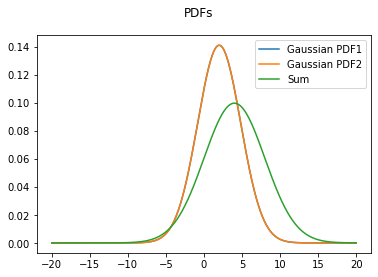

In [89]:
plt.plot(big_grid, pdf1, label='Gaussian PDF1')
plt.plot(big_grid, pdf2, label='Gaussian PDF2')
plt.plot(big_grid, conv_pdf, label='Sum')
plt.legend(loc='best'), plt.suptitle('PDFs')
plt.show() 

## Mean and variance of convoluted PDF

In [90]:
#E(Z)=E(X)+E(Y); Var(Z)=Var(X)+Var(Y); if E(X)=E(Y)=2 and Var(X)=Var(Y)=8 it follows E(Z)=4 and Var(Z)=16

In [91]:
#mean
E_Z = (big_grid * conv_pmf).sum(); E_Z  #E(Z) = Σ z . P(z): sum(z[j] * p(z[j]))  expected: E(Z)=4

3.999437910282657

In [92]:
E_Z_squared = (big_grid**2 * conv_pmf).sum(); E_Z_squared  #E(Z²) = Σ z² . P(z): sum(z[j]² * p(z[j]))

31.98693625548857

In [93]:
#variance
Var_Z =  E_Z_squared - (E_Z)**2; Var_Z  #Var(Z) = E(Z²) - E(Z)²; expected: Var(Z)=16

15.991432657282461

## Reference implementation

In [94]:
import openturns as ot

In [95]:
mean = 2  #E(X)=E(Y)=2
std = np.sqrt(8)  #Var(X)=Var(Y)=8

In [96]:
X = ot.Normal(mean, std)  # Normal distribution mean = 2, std = √8
Y = ot.Normal(mean, std)  # Normal distribution mean = 2, std = √8

In [97]:
Z = X + Y  #sum of two gaussian random variables

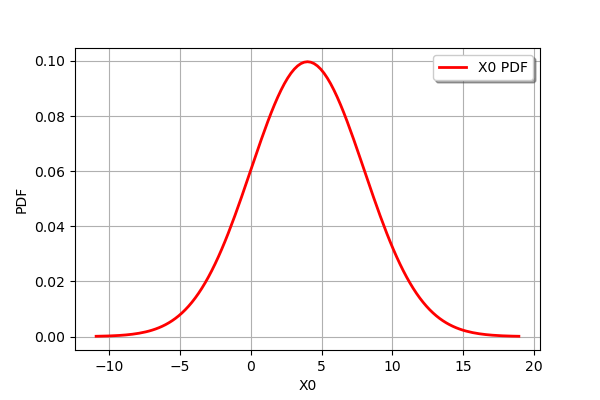

In [98]:
Z.drawPDF()

In [99]:
Z.getMean()  #E(Z)=E(X)+E(Y)=4

class=Point name=Unnamed dimension=1 values=[4]

In [100]:
Z.getCovariance()  #Var(Z)=Var(X)+Var(Y)=16

class=CovarianceMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[16]